In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output as clear
from ipywidgets import IntProgress
from IPython.display import display
from Slide import * 
import ipywidgets as widgets
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
max_image_num = 900
slides=[]
p_bar = IntProgress(max=max_image_num)
p_bar.value = 0
p_bar.description = 'loading'
# load image information
with open('data/image_info.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        s_name = row[1].strip()
        s_image = mpimg.imread('data/ImageDataset/{image_name}.jpg'.format(image_name = s_name))
        s_valence = float(row[4])
        s_arousal = float(row[5])
        s_intensity = float(row[6])
        s_dominant_color = np.array(list(map(float,row[7:10])))
        slides.append(Slide(p_bar.value,
                            s_name,
                            s_image,
                            s_valence,
                            s_arousal,
                            s_intensity,
                            s_dominant_color))
        p_bar.value += 1
        if p_bar.value >= max_image_num:
            break
        p_bar.description = '{loaded}-{percent}%'.format(loaded=p_bar.value+1,percent=(p_bar.value+1)/max_image_num*100)
        display(p_bar)
      


IntProgress(value=1, description='2-0.2222222222222222%', max=900)

IntProgress(value=2, description='3-0.33333333333333337%', max=900)

IntProgress(value=3, description='4-0.4444444444444444%', max=900)

IntProgress(value=4, description='5-0.5555555555555556%', max=900)

IntProgress(value=5, description='6-0.6666666666666667%', max=900)

IntProgress(value=6, description='7-0.7777777777777778%', max=900)

IntProgress(value=7, description='8-0.8888888888888888%', max=900)

IntProgress(value=8, description='9-1.0%', max=900)

IntProgress(value=9, description='10-1.1111111111111112%', max=900)

IntProgress(value=10, description='11-1.2222222222222223%', max=900)

IntProgress(value=11, description='12-1.3333333333333335%', max=900)

IntProgress(value=12, description='13-1.4444444444444444%', max=900)

IntProgress(value=13, description='14-1.5555555555555556%', max=900)

IntProgress(value=14, description='15-1.6666666666666667%', max=900)

IntProgress(value=15, description='16-1.7777777777777777%', max=900)

IntProgress(value=16, description='17-1.8888888888888888%', max=900)

IntProgress(value=17, description='18-2.0%', max=900)

IntProgress(value=18, description='19-2.111111111111111%', max=900)

IntProgress(value=19, description='20-2.2222222222222223%', max=900)

IntProgress(value=20, description='21-2.3333333333333335%', max=900)

IntProgress(value=21, description='22-2.4444444444444446%', max=900)

IntProgress(value=22, description='23-2.555555555555556%', max=900)

IntProgress(value=23, description='24-2.666666666666667%', max=900)

IntProgress(value=24, description='25-2.7777777777777777%', max=900)

IntProgress(value=25, description='26-2.888888888888889%', max=900)

IntProgress(value=26, description='27-3.0%', max=900)

IntProgress(value=27, description='28-3.111111111111111%', max=900)

IntProgress(value=28, description='29-3.2222222222222223%', max=900)

IntProgress(value=29, description='30-3.3333333333333335%', max=900)

IntProgress(value=30, description='31-3.4444444444444446%', max=900)

IntProgress(value=31, description='32-3.5555555555555554%', max=900)

IntProgress(value=32, description='33-3.6666666666666665%', max=900)

IntProgress(value=33, description='34-3.7777777777777777%', max=900)

IntProgress(value=34, description='35-3.888888888888889%', max=900)

IntProgress(value=35, description='36-4.0%', max=900)

IntProgress(value=36, description='37-4.111111111111112%', max=900)

IntProgress(value=37, description='38-4.222222222222222%', max=900)

IntProgress(value=38, description='39-4.333333333333334%', max=900)

IntProgress(value=39, description='40-4.444444444444445%', max=900)

IntProgress(value=40, description='41-4.555555555555555%', max=900)

IntProgress(value=41, description='42-4.666666666666667%', max=900)

IntProgress(value=42, description='43-4.777777777777778%', max=900)

IntProgress(value=43, description='44-4.888888888888889%', max=900)

IntProgress(value=44, description='45-5.0%', max=900)

IntProgress(value=45, description='46-5.111111111111112%', max=900)

IntProgress(value=46, description='47-5.222222222222222%', max=900)

IntProgress(value=47, description='48-5.333333333333334%', max=900)

IntProgress(value=48, description='49-5.444444444444444%', max=900)

IntProgress(value=49, description='50-5.555555555555555%', max=900)

IntProgress(value=50, description='51-5.666666666666666%', max=900)

IntProgress(value=51, description='52-5.777777777777778%', max=900)

IntProgress(value=52, description='53-5.888888888888888%', max=900)

IntProgress(value=53, description='54-6.0%', max=900)

IntProgress(value=54, description='55-6.111111111111111%', max=900)

IntProgress(value=55, description='56-6.222222222222222%', max=900)

IntProgress(value=56, description='57-6.333333333333334%', max=900)

IntProgress(value=57, description='58-6.444444444444445%', max=900)

IntProgress(value=58, description='59-6.555555555555556%', max=900)

IntProgress(value=59, description='60-6.666666666666667%', max=900)

IntProgress(value=60, description='61-6.777777777777779%', max=900)

IntProgress(value=61, description='62-6.888888888888889%', max=900)

IntProgress(value=62, description='63-7.000000000000001%', max=900)

IntProgress(value=63, description='64-7.111111111111111%', max=900)

IntProgress(value=64, description='65-7.222222222222221%', max=900)

IntProgress(value=65, description='66-7.333333333333333%', max=900)

IntProgress(value=66, description='67-7.444444444444444%', max=900)

IntProgress(value=67, description='68-7.555555555555555%', max=900)

IntProgress(value=68, description='69-7.666666666666666%', max=900)

IntProgress(value=69, description='70-7.777777777777778%', max=900)

IntProgress(value=70, description='71-7.888888888888888%', max=900)

IntProgress(value=71, description='72-8.0%', max=900)

IntProgress(value=72, description='73-8.11111111111111%', max=900)

IntProgress(value=73, description='74-8.222222222222223%', max=900)

IntProgress(value=74, description='75-8.333333333333332%', max=900)

IntProgress(value=75, description='76-8.444444444444445%', max=900)

IntProgress(value=76, description='77-8.555555555555555%', max=900)

IntProgress(value=77, description='78-8.666666666666668%', max=900)

IntProgress(value=78, description='79-8.777777777777777%', max=900)

IntProgress(value=79, description='80-8.88888888888889%', max=900)

IntProgress(value=80, description='81-9.0%', max=900)

IntProgress(value=81, description='82-9.11111111111111%', max=900)

IntProgress(value=82, description='83-9.222222222222221%', max=900)

IntProgress(value=83, description='84-9.333333333333334%', max=900)

IntProgress(value=84, description='85-9.444444444444445%', max=900)

IntProgress(value=85, description='86-9.555555555555555%', max=900)

IntProgress(value=86, description='87-9.666666666666666%', max=900)

IntProgress(value=87, description='88-9.777777777777779%', max=900)

IntProgress(value=88, description='89-9.88888888888889%', max=900)

IntProgress(value=89, description='90-10.0%', max=900)

IntProgress(value=90, description='91-10.11111111111111%', max=900)

IntProgress(value=91, description='92-10.222222222222223%', max=900)

IntProgress(value=92, description='93-10.333333333333334%', max=900)

IntProgress(value=93, description='94-10.444444444444445%', max=900)

IntProgress(value=94, description='95-10.555555555555555%', max=900)

IntProgress(value=95, description='96-10.666666666666668%', max=900)

IntProgress(value=96, description='97-10.777777777777779%', max=900)

IntProgress(value=97, description='98-10.888888888888888%', max=900)

IntProgress(value=98, description='99-11.0%', max=900)

IntProgress(value=99, description='100-11.11111111111111%', max=900)

IntProgress(value=100, description='101-11.222222222222221%', max=900)

IntProgress(value=101, description='102-11.333333333333332%', max=900)

IntProgress(value=102, description='103-11.444444444444445%', max=900)

IntProgress(value=103, description='104-11.555555555555555%', max=900)

IntProgress(value=104, description='105-11.666666666666666%', max=900)

IntProgress(value=105, description='106-11.777777777777777%', max=900)

IntProgress(value=106, description='107-11.88888888888889%', max=900)

IntProgress(value=107, description='108-12.0%', max=900)

IntProgress(value=108, description='109-12.11111111111111%', max=900)

IntProgress(value=109, description='110-12.222222222222221%', max=900)

IntProgress(value=110, description='111-12.333333333333334%', max=900)

IntProgress(value=111, description='112-12.444444444444445%', max=900)

IntProgress(value=112, description='113-12.555555555555555%', max=900)

IntProgress(value=113, description='114-12.666666666666668%', max=900)

IntProgress(value=114, description='115-12.777777777777777%', max=900)

IntProgress(value=115, description='116-12.88888888888889%', max=900)

IntProgress(value=116, description='117-13.0%', max=900)

IntProgress(value=117, description='118-13.111111111111112%', max=900)

IntProgress(value=118, description='119-13.222222222222221%', max=900)

IntProgress(value=119, description='120-13.333333333333334%', max=900)

IntProgress(value=120, description='121-13.444444444444445%', max=900)

IntProgress(value=121, description='122-13.555555555555557%', max=900)

IntProgress(value=122, description='123-13.666666666666666%', max=900)

IntProgress(value=123, description='124-13.777777777777779%', max=900)

IntProgress(value=124, description='125-13.88888888888889%', max=900)

IntProgress(value=125, description='126-14.000000000000002%', max=900)

IntProgress(value=126, description='127-14.11111111111111%', max=900)

IntProgress(value=127, description='128-14.222222222222221%', max=900)

IntProgress(value=128, description='129-14.333333333333334%', max=900)

IntProgress(value=129, description='130-14.444444444444443%', max=900)

IntProgress(value=130, description='131-14.555555555555555%', max=900)

IntProgress(value=131, description='132-14.666666666666666%', max=900)

IntProgress(value=132, description='133-14.777777777777779%', max=900)

IntProgress(value=133, description='134-14.888888888888888%', max=900)

IntProgress(value=134, description='135-15.0%', max=900)

IntProgress(value=135, description='136-15.11111111111111%', max=900)

IntProgress(value=136, description='137-15.222222222222223%', max=900)

IntProgress(value=137, description='138-15.333333333333332%', max=900)

IntProgress(value=138, description='139-15.444444444444445%', max=900)

IntProgress(value=139, description='140-15.555555555555555%', max=900)

IntProgress(value=140, description='141-15.666666666666668%', max=900)

IntProgress(value=141, description='142-15.777777777777777%', max=900)

IntProgress(value=142, description='143-15.88888888888889%', max=900)

IntProgress(value=143, description='144-16.0%', max=900)

IntProgress(value=144, description='145-16.11111111111111%', max=900)

IntProgress(value=145, description='146-16.22222222222222%', max=900)

IntProgress(value=146, description='147-16.333333333333332%', max=900)

IntProgress(value=147, description='148-16.444444444444446%', max=900)

IntProgress(value=148, description='149-16.555555555555557%', max=900)

IntProgress(value=149, description='150-16.666666666666664%', max=900)

IntProgress(value=150, description='151-16.77777777777778%', max=900)

IntProgress(value=151, description='152-16.88888888888889%', max=900)

IntProgress(value=152, description='153-17.0%', max=900)

IntProgress(value=153, description='154-17.11111111111111%', max=900)

IntProgress(value=154, description='155-17.22222222222222%', max=900)

IntProgress(value=155, description='156-17.333333333333336%', max=900)

IntProgress(value=156, description='157-17.444444444444446%', max=900)

IntProgress(value=157, description='158-17.555555555555554%', max=900)

IntProgress(value=158, description='159-17.666666666666668%', max=900)

IntProgress(value=159, description='160-17.77777777777778%', max=900)

IntProgress(value=160, description='161-17.888888888888886%', max=900)

IntProgress(value=161, description='162-18.0%', max=900)

IntProgress(value=162, description='163-18.11111111111111%', max=900)

IntProgress(value=163, description='164-18.22222222222222%', max=900)

IntProgress(value=164, description='165-18.333333333333332%', max=900)

IntProgress(value=165, description='166-18.444444444444443%', max=900)

IntProgress(value=166, description='167-18.555555555555557%', max=900)

IntProgress(value=167, description='168-18.666666666666668%', max=900)

IntProgress(value=168, description='169-18.777777777777775%', max=900)

IntProgress(value=169, description='170-18.88888888888889%', max=900)

IntProgress(value=170, description='171-19.0%', max=900)

IntProgress(value=171, description='172-19.11111111111111%', max=900)

IntProgress(value=172, description='173-19.22222222222222%', max=900)

IntProgress(value=173, description='174-19.333333333333332%', max=900)

IntProgress(value=174, description='175-19.444444444444446%', max=900)

IntProgress(value=175, description='176-19.555555555555557%', max=900)

IntProgress(value=176, description='177-19.666666666666664%', max=900)

IntProgress(value=177, description='178-19.77777777777778%', max=900)

IntProgress(value=178, description='179-19.88888888888889%', max=900)

IntProgress(value=179, description='180-20.0%', max=900)

IntProgress(value=180, description='181-20.11111111111111%', max=900)

IntProgress(value=181, description='182-20.22222222222222%', max=900)

IntProgress(value=182, description='183-20.333333333333332%', max=900)

IntProgress(value=183, description='184-20.444444444444446%', max=900)

IntProgress(value=184, description='185-20.555555555555554%', max=900)

IntProgress(value=185, description='186-20.666666666666668%', max=900)

IntProgress(value=186, description='187-20.77777777777778%', max=900)

IntProgress(value=187, description='188-20.88888888888889%', max=900)

IntProgress(value=188, description='189-21.0%', max=900)

IntProgress(value=189, description='190-21.11111111111111%', max=900)

IntProgress(value=190, description='191-21.22222222222222%', max=900)

IntProgress(value=191, description='192-21.333333333333336%', max=900)

IntProgress(value=192, description='193-21.444444444444443%', max=900)

IntProgress(value=193, description='194-21.555555555555557%', max=900)

IntProgress(value=194, description='195-21.666666666666668%', max=900)

IntProgress(value=195, description='196-21.777777777777775%', max=900)

IntProgress(value=196, description='197-21.88888888888889%', max=900)

IntProgress(value=197, description='198-22.0%', max=900)

IntProgress(value=198, description='199-22.11111111111111%', max=900)

IntProgress(value=199, description='200-22.22222222222222%', max=900)

IntProgress(value=200, description='201-22.333333333333332%', max=900)

IntProgress(value=201, description='202-22.444444444444443%', max=900)

IntProgress(value=202, description='203-22.555555555555557%', max=900)

IntProgress(value=203, description='204-22.666666666666664%', max=900)

IntProgress(value=204, description='205-22.77777777777778%', max=900)

IntProgress(value=205, description='206-22.88888888888889%', max=900)

IntProgress(value=206, description='207-23.0%', max=900)

IntProgress(value=207, description='208-23.11111111111111%', max=900)

IntProgress(value=208, description='209-23.22222222222222%', max=900)

IntProgress(value=209, description='210-23.333333333333332%', max=900)

IntProgress(value=210, description='211-23.444444444444446%', max=900)

IntProgress(value=211, description='212-23.555555555555554%', max=900)

IntProgress(value=212, description='213-23.666666666666668%', max=900)

IntProgress(value=213, description='214-23.77777777777778%', max=900)

IntProgress(value=214, description='215-23.88888888888889%', max=900)

IntProgress(value=215, description='216-24.0%', max=900)

IntProgress(value=216, description='217-24.11111111111111%', max=900)

IntProgress(value=217, description='218-24.22222222222222%', max=900)

IntProgress(value=218, description='219-24.333333333333336%', max=900)

IntProgress(value=219, description='220-24.444444444444443%', max=900)

IntProgress(value=220, description='221-24.555555555555557%', max=900)

IntProgress(value=221, description='222-24.666666666666668%', max=900)

IntProgress(value=222, description='223-24.77777777777778%', max=900)

IntProgress(value=223, description='224-24.88888888888889%', max=900)

IntProgress(value=224, description='225-25.0%', max=900)

IntProgress(value=225, description='226-25.11111111111111%', max=900)

IntProgress(value=226, description='227-25.222222222222225%', max=900)

IntProgress(value=227, description='228-25.333333333333336%', max=900)

IntProgress(value=228, description='229-25.444444444444443%', max=900)

IntProgress(value=229, description='230-25.555555555555554%', max=900)

IntProgress(value=230, description='231-25.666666666666664%', max=900)

IntProgress(value=231, description='232-25.77777777777778%', max=900)

IntProgress(value=232, description='233-25.88888888888889%', max=900)

IntProgress(value=233, description='234-26.0%', max=900)

IntProgress(value=234, description='235-26.111111111111114%', max=900)

IntProgress(value=235, description='236-26.222222222222225%', max=900)

IntProgress(value=236, description='237-26.333333333333332%', max=900)

IntProgress(value=237, description='238-26.444444444444443%', max=900)

IntProgress(value=238, description='239-26.555555555555554%', max=900)

IntProgress(value=239, description='240-26.666666666666668%', max=900)

IntProgress(value=240, description='241-26.77777777777778%', max=900)

IntProgress(value=241, description='242-26.88888888888889%', max=900)

IntProgress(value=242, description='243-27.0%', max=900)

IntProgress(value=243, description='244-27.111111111111114%', max=900)

IntProgress(value=244, description='245-27.22222222222222%', max=900)

IntProgress(value=245, description='246-27.333333333333332%', max=900)

IntProgress(value=246, description='247-27.444444444444443%', max=900)

IntProgress(value=247, description='248-27.555555555555557%', max=900)

IntProgress(value=248, description='249-27.666666666666668%', max=900)

IntProgress(value=249, description='250-27.77777777777778%', max=900)

IntProgress(value=250, description='251-27.88888888888889%', max=900)

IntProgress(value=251, description='252-28.000000000000004%', max=900)

IntProgress(value=252, description='253-28.111111111111107%', max=900)

IntProgress(value=253, description='254-28.22222222222222%', max=900)

IntProgress(value=254, description='255-28.333333333333332%', max=900)

IntProgress(value=255, description='256-28.444444444444443%', max=900)

IntProgress(value=256, description='257-28.555555555555557%', max=900)

IntProgress(value=257, description='258-28.666666666666668%', max=900)

IntProgress(value=258, description='259-28.77777777777778%', max=900)

IntProgress(value=259, description='260-28.888888888888886%', max=900)

IntProgress(value=260, description='261-28.999999999999996%', max=900)

IntProgress(value=261, description='262-29.11111111111111%', max=900)

IntProgress(value=262, description='263-29.22222222222222%', max=900)

IntProgress(value=263, description='264-29.333333333333332%', max=900)

IntProgress(value=264, description='265-29.444444444444446%', max=900)

IntProgress(value=265, description='266-29.555555555555557%', max=900)

IntProgress(value=266, description='267-29.666666666666668%', max=900)

IntProgress(value=267, description='268-29.777777777777775%', max=900)

IntProgress(value=268, description='269-29.888888888888886%', max=900)

IntProgress(value=269, description='270-30.0%', max=900)

IntProgress(value=270, description='271-30.11111111111111%', max=900)

IntProgress(value=271, description='272-30.22222222222222%', max=900)

IntProgress(value=272, description='273-30.333333333333336%', max=900)

IntProgress(value=273, description='274-30.444444444444446%', max=900)

IntProgress(value=274, description='275-30.555555555555557%', max=900)

IntProgress(value=275, description='276-30.666666666666664%', max=900)

IntProgress(value=276, description='277-30.777777777777775%', max=900)

IntProgress(value=277, description='278-30.88888888888889%', max=900)

IntProgress(value=278, description='279-31.0%', max=900)

IntProgress(value=279, description='280-31.11111111111111%', max=900)

IntProgress(value=280, description='281-31.222222222222225%', max=900)

IntProgress(value=281, description='282-31.333333333333336%', max=900)

IntProgress(value=282, description='283-31.444444444444446%', max=900)

IntProgress(value=283, description='284-31.555555555555554%', max=900)

IntProgress(value=284, description='285-31.666666666666664%', max=900)

IntProgress(value=285, description='286-31.77777777777778%', max=900)

IntProgress(value=286, description='287-31.88888888888889%', max=900)

IntProgress(value=287, description='288-32.0%', max=900)

IntProgress(value=288, description='289-32.111111111111114%', max=900)

IntProgress(value=289, description='290-32.22222222222222%', max=900)

IntProgress(value=290, description='291-32.33333333333333%', max=900)

IntProgress(value=291, description='292-32.44444444444444%', max=900)

IntProgress(value=292, description='293-32.55555555555556%', max=900)

IntProgress(value=293, description='294-32.666666666666664%', max=900)

IntProgress(value=294, description='295-32.77777777777778%', max=900)

IntProgress(value=295, description='296-32.88888888888889%', max=900)

IntProgress(value=296, description='297-33.0%', max=900)

IntProgress(value=297, description='298-33.111111111111114%', max=900)

IntProgress(value=298, description='299-33.22222222222222%', max=900)

IntProgress(value=299, description='300-33.33333333333333%', max=900)

IntProgress(value=300, description='301-33.44444444444444%', max=900)

IntProgress(value=301, description='302-33.55555555555556%', max=900)

IntProgress(value=302, description='303-33.666666666666664%', max=900)

IntProgress(value=303, description='304-33.77777777777778%', max=900)

IntProgress(value=304, description='305-33.88888888888889%', max=900)

IntProgress(value=305, description='306-34.0%', max=900)

IntProgress(value=306, description='307-34.11111111111111%', max=900)

IntProgress(value=307, description='308-34.22222222222222%', max=900)

IntProgress(value=308, description='309-34.333333333333336%', max=900)

IntProgress(value=309, description='310-34.44444444444444%', max=900)

IntProgress(value=310, description='311-34.55555555555556%', max=900)

IntProgress(value=311, description='312-34.66666666666667%', max=900)

IntProgress(value=312, description='313-34.77777777777778%', max=900)

IntProgress(value=313, description='314-34.88888888888889%', max=900)

IntProgress(value=314, description='315-35.0%', max=900)

IntProgress(value=315, description='316-35.11111111111111%', max=900)

IntProgress(value=316, description='317-35.22222222222222%', max=900)

IntProgress(value=317, description='318-35.333333333333336%', max=900)

IntProgress(value=318, description='319-35.44444444444444%', max=900)

IntProgress(value=319, description='320-35.55555555555556%', max=900)

IntProgress(value=320, description='321-35.66666666666667%', max=900)

IntProgress(value=321, description='322-35.77777777777777%', max=900)

IntProgress(value=322, description='323-35.888888888888886%', max=900)

IntProgress(value=323, description='324-36.0%', max=900)

IntProgress(value=324, description='325-36.11111111111111%', max=900)

IntProgress(value=325, description='326-36.22222222222222%', max=900)

IntProgress(value=326, description='327-36.333333333333336%', max=900)

IntProgress(value=327, description='328-36.44444444444444%', max=900)

IntProgress(value=328, description='329-36.55555555555556%', max=900)

IntProgress(value=329, description='330-36.666666666666664%', max=900)

IntProgress(value=330, description='331-36.77777777777778%', max=900)

IntProgress(value=331, description='332-36.888888888888886%', max=900)

IntProgress(value=332, description='333-37.0%', max=900)

IntProgress(value=333, description='334-37.111111111111114%', max=900)

IntProgress(value=334, description='335-37.22222222222222%', max=900)

IntProgress(value=335, description='336-37.333333333333336%', max=900)

IntProgress(value=336, description='337-37.44444444444445%', max=900)

IntProgress(value=337, description='338-37.55555555555555%', max=900)

IntProgress(value=338, description='339-37.666666666666664%', max=900)

IntProgress(value=339, description='340-37.77777777777778%', max=900)

IntProgress(value=340, description='341-37.888888888888886%', max=900)

IntProgress(value=341, description='342-38.0%', max=900)

IntProgress(value=342, description='343-38.111111111111114%', max=900)

IntProgress(value=343, description='344-38.22222222222222%', max=900)

IntProgress(value=344, description='345-38.333333333333336%', max=900)

IntProgress(value=345, description='346-38.44444444444444%', max=900)

IntProgress(value=346, description='347-38.55555555555556%', max=900)

IntProgress(value=347, description='348-38.666666666666664%', max=900)

IntProgress(value=348, description='349-38.77777777777778%', max=900)

IntProgress(value=349, description='350-38.88888888888889%', max=900)

IntProgress(value=350, description='351-39.0%', max=900)

IntProgress(value=351, description='352-39.111111111111114%', max=900)

IntProgress(value=352, description='353-39.22222222222223%', max=900)

IntProgress(value=353, description='354-39.33333333333333%', max=900)

IntProgress(value=354, description='355-39.44444444444444%', max=900)

IntProgress(value=355, description='356-39.55555555555556%', max=900)

IntProgress(value=356, description='357-39.666666666666664%', max=900)

IntProgress(value=357, description='358-39.77777777777778%', max=900)

IntProgress(value=358, description='359-39.88888888888889%', max=900)

IntProgress(value=359, description='360-40.0%', max=900)

IntProgress(value=360, description='361-40.11111111111111%', max=900)

IntProgress(value=361, description='362-40.22222222222222%', max=900)

IntProgress(value=362, description='363-40.33333333333333%', max=900)

IntProgress(value=363, description='364-40.44444444444444%', max=900)

IntProgress(value=364, description='365-40.55555555555556%', max=900)

IntProgress(value=365, description='366-40.666666666666664%', max=900)

IntProgress(value=366, description='367-40.77777777777778%', max=900)

IntProgress(value=367, description='368-40.88888888888889%', max=900)

IntProgress(value=368, description='369-41.0%', max=900)

IntProgress(value=369, description='370-41.11111111111111%', max=900)

IntProgress(value=370, description='371-41.22222222222222%', max=900)

IntProgress(value=371, description='372-41.333333333333336%', max=900)

IntProgress(value=372, description='373-41.44444444444444%', max=900)

IntProgress(value=373, description='374-41.55555555555556%', max=900)

IntProgress(value=374, description='375-41.66666666666667%', max=900)

IntProgress(value=375, description='376-41.77777777777778%', max=900)

IntProgress(value=376, description='377-41.888888888888886%', max=900)

IntProgress(value=377, description='378-42.0%', max=900)

IntProgress(value=378, description='379-42.11111111111111%', max=900)

IntProgress(value=379, description='380-42.22222222222222%', max=900)

IntProgress(value=380, description='381-42.333333333333336%', max=900)

IntProgress(value=381, description='382-42.44444444444444%', max=900)

IntProgress(value=382, description='383-42.55555555555556%', max=900)

IntProgress(value=383, description='384-42.66666666666667%', max=900)

IntProgress(value=384, description='385-42.77777777777778%', max=900)

IntProgress(value=385, description='386-42.888888888888886%', max=900)

IntProgress(value=386, description='387-43.0%', max=900)

IntProgress(value=387, description='388-43.111111111111114%', max=900)

IntProgress(value=388, description='389-43.22222222222222%', max=900)

IntProgress(value=389, description='390-43.333333333333336%', max=900)

IntProgress(value=390, description='391-43.44444444444445%', max=900)

IntProgress(value=391, description='392-43.55555555555555%', max=900)

IntProgress(value=392, description='393-43.666666666666664%', max=900)

IntProgress(value=393, description='394-43.77777777777778%', max=900)

IntProgress(value=394, description='395-43.888888888888886%', max=900)

IntProgress(value=395, description='396-44.0%', max=900)

IntProgress(value=396, description='397-44.111111111111114%', max=900)

IntProgress(value=397, description='398-44.22222222222222%', max=900)

IntProgress(value=398, description='399-44.333333333333336%', max=900)

IntProgress(value=399, description='400-44.44444444444444%', max=900)

IntProgress(value=400, description='401-44.55555555555556%', max=900)

IntProgress(value=401, description='402-44.666666666666664%', max=900)

IntProgress(value=402, description='403-44.77777777777778%', max=900)

IntProgress(value=403, description='404-44.888888888888886%', max=900)

IntProgress(value=404, description='405-45.0%', max=900)

IntProgress(value=405, description='406-45.111111111111114%', max=900)

IntProgress(value=406, description='407-45.22222222222222%', max=900)

IntProgress(value=407, description='408-45.33333333333333%', max=900)

IntProgress(value=408, description='409-45.44444444444444%', max=900)

IntProgress(value=409, description='410-45.55555555555556%', max=900)

IntProgress(value=410, description='411-45.666666666666664%', max=900)

IntProgress(value=411, description='412-45.77777777777778%', max=900)

IntProgress(value=412, description='413-45.88888888888889%', max=900)

IntProgress(value=413, description='414-46.0%', max=900)

IntProgress(value=414, description='415-46.111111111111114%', max=900)

IntProgress(value=415, description='416-46.22222222222222%', max=900)

IntProgress(value=416, description='417-46.33333333333333%', max=900)

IntProgress(value=417, description='418-46.44444444444444%', max=900)

IntProgress(value=418, description='419-46.55555555555556%', max=900)

IntProgress(value=419, description='420-46.666666666666664%', max=900)

IntProgress(value=420, description='421-46.77777777777778%', max=900)

IntProgress(value=421, description='422-46.88888888888889%', max=900)

IntProgress(value=422, description='423-47.0%', max=900)

IntProgress(value=423, description='424-47.11111111111111%', max=900)

IntProgress(value=424, description='425-47.22222222222222%', max=900)

IntProgress(value=425, description='426-47.333333333333336%', max=900)

IntProgress(value=426, description='427-47.44444444444444%', max=900)

IntProgress(value=427, description='428-47.55555555555556%', max=900)

IntProgress(value=428, description='429-47.66666666666667%', max=900)

IntProgress(value=429, description='430-47.77777777777778%', max=900)

IntProgress(value=430, description='431-47.888888888888886%', max=900)

IntProgress(value=431, description='432-48.0%', max=900)

IntProgress(value=432, description='433-48.11111111111111%', max=900)

IntProgress(value=433, description='434-48.22222222222222%', max=900)

IntProgress(value=434, description='435-48.333333333333336%', max=900)

IntProgress(value=435, description='436-48.44444444444444%', max=900)

IntProgress(value=436, description='437-48.55555555555556%', max=900)

IntProgress(value=437, description='438-48.66666666666667%', max=900)

IntProgress(value=438, description='439-48.77777777777778%', max=900)

IntProgress(value=439, description='440-48.888888888888886%', max=900)

IntProgress(value=440, description='441-49.0%', max=900)

IntProgress(value=441, description='442-49.111111111111114%', max=900)

IntProgress(value=442, description='443-49.22222222222222%', max=900)

IntProgress(value=443, description='444-49.333333333333336%', max=900)

IntProgress(value=444, description='445-49.44444444444444%', max=900)

IntProgress(value=445, description='446-49.55555555555556%', max=900)

IntProgress(value=446, description='447-49.666666666666664%', max=900)

IntProgress(value=447, description='448-49.77777777777778%', max=900)

IntProgress(value=448, description='449-49.888888888888886%', max=900)

IntProgress(value=449, description='450-50.0%', max=900)

IntProgress(value=450, description='451-50.11111111111111%', max=900)

IntProgress(value=451, description='452-50.22222222222222%', max=900)

IntProgress(value=452, description='453-50.33333333333333%', max=900)

IntProgress(value=453, description='454-50.44444444444445%', max=900)

IntProgress(value=454, description='455-50.55555555555556%', max=900)

IntProgress(value=455, description='456-50.66666666666667%', max=900)

IntProgress(value=456, description='457-50.77777777777778%', max=900)

IntProgress(value=457, description='458-50.888888888888886%', max=900)

IntProgress(value=458, description='459-51.0%', max=900)

IntProgress(value=459, description='460-51.11111111111111%', max=900)

IntProgress(value=460, description='461-51.22222222222222%', max=900)

IntProgress(value=461, description='462-51.33333333333333%', max=900)

IntProgress(value=462, description='463-51.44444444444445%', max=900)

IntProgress(value=463, description='464-51.55555555555556%', max=900)

IntProgress(value=464, description='465-51.66666666666667%', max=900)

IntProgress(value=465, description='466-51.77777777777778%', max=900)

IntProgress(value=466, description='467-51.888888888888886%', max=900)

IntProgress(value=467, description='468-52.0%', max=900)

IntProgress(value=468, description='469-52.11111111111111%', max=900)

IntProgress(value=469, description='470-52.22222222222223%', max=900)

IntProgress(value=470, description='471-52.33333333333333%', max=900)

IntProgress(value=471, description='472-52.44444444444445%', max=900)

IntProgress(value=472, description='473-52.55555555555556%', max=900)

IntProgress(value=473, description='474-52.666666666666664%', max=900)

IntProgress(value=474, description='475-52.77777777777778%', max=900)

IntProgress(value=475, description='476-52.888888888888886%', max=900)

IntProgress(value=476, description='477-53.0%', max=900)

IntProgress(value=477, description='478-53.11111111111111%', max=900)

IntProgress(value=478, description='479-53.22222222222223%', max=900)

IntProgress(value=479, description='480-53.333333333333336%', max=900)

IntProgress(value=480, description='481-53.44444444444445%', max=900)

IntProgress(value=481, description='482-53.55555555555556%', max=900)

IntProgress(value=482, description='483-53.666666666666664%', max=900)

IntProgress(value=483, description='484-53.77777777777778%', max=900)

IntProgress(value=484, description='485-53.888888888888886%', max=900)

IntProgress(value=485, description='486-54.0%', max=900)

IntProgress(value=486, description='487-54.11111111111111%', max=900)

IntProgress(value=487, description='488-54.22222222222223%', max=900)

IntProgress(value=488, description='489-54.333333333333336%', max=900)

IntProgress(value=489, description='490-54.44444444444444%', max=900)

IntProgress(value=490, description='491-54.55555555555556%', max=900)

IntProgress(value=491, description='492-54.666666666666664%', max=900)

IntProgress(value=492, description='493-54.77777777777778%', max=900)

IntProgress(value=493, description='494-54.888888888888886%', max=900)

IntProgress(value=494, description='495-55.00000000000001%', max=900)

IntProgress(value=495, description='496-55.111111111111114%', max=900)

IntProgress(value=496, description='497-55.222222222222214%', max=900)

IntProgress(value=497, description='498-55.333333333333336%', max=900)

IntProgress(value=498, description='499-55.44444444444444%', max=900)

IntProgress(value=499, description='500-55.55555555555556%', max=900)

IntProgress(value=500, description='501-55.666666666666664%', max=900)

IntProgress(value=501, description='502-55.77777777777778%', max=900)

IntProgress(value=502, description='503-55.888888888888886%', max=900)

IntProgress(value=503, description='504-56.00000000000001%', max=900)

IntProgress(value=504, description='505-56.111111111111114%', max=900)

IntProgress(value=505, description='506-56.222222222222214%', max=900)

IntProgress(value=506, description='507-56.333333333333336%', max=900)

IntProgress(value=507, description='508-56.44444444444444%', max=900)

IntProgress(value=508, description='509-56.55555555555556%', max=900)

IntProgress(value=509, description='510-56.666666666666664%', max=900)

IntProgress(value=510, description='511-56.777777777777786%', max=900)

IntProgress(value=511, description='512-56.888888888888886%', max=900)

IntProgress(value=512, description='513-56.99999999999999%', max=900)

IntProgress(value=513, description='514-57.111111111111114%', max=900)

IntProgress(value=514, description='515-57.22222222222222%', max=900)

IntProgress(value=515, description='516-57.333333333333336%', max=900)

IntProgress(value=516, description='517-57.44444444444444%', max=900)

IntProgress(value=517, description='518-57.55555555555556%', max=900)

IntProgress(value=518, description='519-57.666666666666664%', max=900)

IntProgress(value=519, description='520-57.77777777777777%', max=900)

IntProgress(value=520, description='521-57.88888888888889%', max=900)

IntProgress(value=521, description='522-57.99999999999999%', max=900)

IntProgress(value=522, description='523-58.111111111111114%', max=900)

IntProgress(value=523, description='524-58.22222222222222%', max=900)

IntProgress(value=524, description='525-58.333333333333336%', max=900)

IntProgress(value=525, description='526-58.44444444444444%', max=900)

IntProgress(value=526, description='527-58.55555555555556%', max=900)

IntProgress(value=527, description='528-58.666666666666664%', max=900)

IntProgress(value=528, description='529-58.77777777777777%', max=900)

IntProgress(value=529, description='530-58.88888888888889%', max=900)

IntProgress(value=530, description='531-59.0%', max=900)

IntProgress(value=531, description='532-59.111111111111114%', max=900)

IntProgress(value=532, description='533-59.22222222222222%', max=900)

IntProgress(value=533, description='534-59.333333333333336%', max=900)

IntProgress(value=534, description='535-59.44444444444444%', max=900)

IntProgress(value=535, description='536-59.55555555555555%', max=900)

IntProgress(value=536, description='537-59.66666666666667%', max=900)

IntProgress(value=537, description='538-59.77777777777777%', max=900)

IntProgress(value=538, description='539-59.88888888888889%', max=900)

IntProgress(value=539, description='540-60.0%', max=900)

IntProgress(value=540, description='541-60.111111111111114%', max=900)

IntProgress(value=541, description='542-60.22222222222222%', max=900)

IntProgress(value=542, description='543-60.333333333333336%', max=900)

IntProgress(value=543, description='544-60.44444444444444%', max=900)

IntProgress(value=544, description='545-60.55555555555555%', max=900)

IntProgress(value=545, description='546-60.66666666666667%', max=900)

IntProgress(value=546, description='547-60.77777777777777%', max=900)

IntProgress(value=547, description='548-60.88888888888889%', max=900)

IntProgress(value=548, description='549-61.0%', max=900)

IntProgress(value=549, description='550-61.111111111111114%', max=900)

IntProgress(value=550, description='551-61.22222222222222%', max=900)

IntProgress(value=551, description='552-61.33333333333333%', max=900)

IntProgress(value=552, description='553-61.44444444444444%', max=900)

IntProgress(value=553, description='554-61.55555555555555%', max=900)

IntProgress(value=554, description='555-61.66666666666667%', max=900)

IntProgress(value=555, description='556-61.77777777777778%', max=900)

IntProgress(value=556, description='557-61.88888888888889%', max=900)

IntProgress(value=557, description='558-62.0%', max=900)

IntProgress(value=558, description='559-62.11111111111111%', max=900)

IntProgress(value=559, description='560-62.22222222222222%', max=900)

IntProgress(value=560, description='561-62.33333333333333%', max=900)

IntProgress(value=561, description='562-62.44444444444445%', max=900)

IntProgress(value=562, description='563-62.55555555555555%', max=900)

IntProgress(value=563, description='564-62.66666666666667%', max=900)

IntProgress(value=564, description='565-62.77777777777778%', max=900)

IntProgress(value=565, description='566-62.88888888888889%', max=900)

IntProgress(value=566, description='567-63.0%', max=900)

IntProgress(value=567, description='568-63.11111111111111%', max=900)

IntProgress(value=568, description='569-63.22222222222222%', max=900)

IntProgress(value=569, description='570-63.33333333333333%', max=900)

IntProgress(value=570, description='571-63.44444444444445%', max=900)

IntProgress(value=571, description='572-63.55555555555556%', max=900)

IntProgress(value=572, description='573-63.66666666666667%', max=900)

IntProgress(value=573, description='574-63.77777777777778%', max=900)

IntProgress(value=574, description='575-63.888888888888886%', max=900)

IntProgress(value=575, description='576-64.0%', max=900)

IntProgress(value=576, description='577-64.11111111111111%', max=900)

IntProgress(value=577, description='578-64.22222222222223%', max=900)

IntProgress(value=578, description='579-64.33333333333333%', max=900)

IntProgress(value=579, description='580-64.44444444444444%', max=900)

IntProgress(value=580, description='581-64.55555555555556%', max=900)

IntProgress(value=581, description='582-64.66666666666666%', max=900)

IntProgress(value=582, description='583-64.77777777777777%', max=900)

IntProgress(value=583, description='584-64.88888888888889%', max=900)

IntProgress(value=584, description='585-65.0%', max=900)

IntProgress(value=585, description='586-65.11111111111111%', max=900)

IntProgress(value=586, description='587-65.22222222222223%', max=900)

IntProgress(value=587, description='588-65.33333333333333%', max=900)

IntProgress(value=588, description='589-65.44444444444444%', max=900)

IntProgress(value=589, description='590-65.55555555555556%', max=900)

IntProgress(value=590, description='591-65.66666666666666%', max=900)

IntProgress(value=591, description='592-65.77777777777779%', max=900)

IntProgress(value=592, description='593-65.88888888888889%', max=900)

IntProgress(value=593, description='594-66.0%', max=900)

IntProgress(value=594, description='595-66.11111111111111%', max=900)

IntProgress(value=595, description='596-66.22222222222223%', max=900)

IntProgress(value=596, description='597-66.33333333333333%', max=900)

IntProgress(value=597, description='598-66.44444444444444%', max=900)

IntProgress(value=598, description='599-66.55555555555556%', max=900)

IntProgress(value=599, description='600-66.66666666666666%', max=900)

IntProgress(value=600, description='601-66.77777777777779%', max=900)

IntProgress(value=601, description='602-66.88888888888889%', max=900)

IntProgress(value=602, description='603-67.0%', max=900)

IntProgress(value=603, description='604-67.11111111111111%', max=900)

IntProgress(value=604, description='605-67.22222222222223%', max=900)

IntProgress(value=605, description='606-67.33333333333333%', max=900)

IntProgress(value=606, description='607-67.44444444444444%', max=900)

IntProgress(value=607, description='608-67.55555555555556%', max=900)

IntProgress(value=608, description='609-67.66666666666666%', max=900)

IntProgress(value=609, description='610-67.77777777777779%', max=900)

IntProgress(value=610, description='611-67.88888888888889%', max=900)

IntProgress(value=611, description='612-68.0%', max=900)

IntProgress(value=612, description='613-68.11111111111111%', max=900)

IntProgress(value=613, description='614-68.22222222222221%', max=900)

IntProgress(value=614, description='615-68.33333333333333%', max=900)

IntProgress(value=615, description='616-68.44444444444444%', max=900)

IntProgress(value=616, description='617-68.55555555555556%', max=900)

IntProgress(value=617, description='618-68.66666666666667%', max=900)

IntProgress(value=618, description='619-68.77777777777779%', max=900)

IntProgress(value=619, description='620-68.88888888888889%', max=900)

IntProgress(value=620, description='621-69.0%', max=900)

IntProgress(value=621, description='622-69.11111111111111%', max=900)

IntProgress(value=622, description='623-69.22222222222221%', max=900)

IntProgress(value=623, description='624-69.33333333333334%', max=900)

IntProgress(value=624, description='625-69.44444444444444%', max=900)

IntProgress(value=625, description='626-69.55555555555556%', max=900)

IntProgress(value=626, description='627-69.66666666666667%', max=900)

IntProgress(value=627, description='628-69.77777777777779%', max=900)

IntProgress(value=628, description='629-69.88888888888889%', max=900)

IntProgress(value=629, description='630-70.0%', max=900)

IntProgress(value=630, description='631-70.11111111111111%', max=900)

IntProgress(value=631, description='632-70.22222222222221%', max=900)

IntProgress(value=632, description='633-70.33333333333334%', max=900)

IntProgress(value=633, description='634-70.44444444444444%', max=900)

IntProgress(value=634, description='635-70.55555555555556%', max=900)

IntProgress(value=635, description='636-70.66666666666667%', max=900)

IntProgress(value=636, description='637-70.77777777777777%', max=900)

IntProgress(value=637, description='638-70.88888888888889%', max=900)

IntProgress(value=638, description='639-71.0%', max=900)

IntProgress(value=639, description='640-71.11111111111111%', max=900)

IntProgress(value=640, description='641-71.22222222222221%', max=900)

IntProgress(value=641, description='642-71.33333333333334%', max=900)

IntProgress(value=642, description='643-71.44444444444444%', max=900)

IntProgress(value=643, description='644-71.55555555555554%', max=900)

IntProgress(value=644, description='645-71.66666666666667%', max=900)

IntProgress(value=645, description='646-71.77777777777777%', max=900)

IntProgress(value=646, description='647-71.88888888888889%', max=900)

IntProgress(value=647, description='648-72.0%', max=900)

IntProgress(value=648, description='649-72.11111111111111%', max=900)

IntProgress(value=649, description='650-72.22222222222221%', max=900)

IntProgress(value=650, description='651-72.33333333333334%', max=900)

IntProgress(value=651, description='652-72.44444444444444%', max=900)

IntProgress(value=652, description='653-72.55555555555556%', max=900)

IntProgress(value=653, description='654-72.66666666666667%', max=900)

IntProgress(value=654, description='655-72.77777777777777%', max=900)

IntProgress(value=655, description='656-72.88888888888889%', max=900)

IntProgress(value=656, description='657-73.0%', max=900)

IntProgress(value=657, description='658-73.11111111111111%', max=900)

IntProgress(value=658, description='659-73.22222222222223%', max=900)

IntProgress(value=659, description='660-73.33333333333333%', max=900)

IntProgress(value=660, description='661-73.44444444444444%', max=900)

IntProgress(value=661, description='662-73.55555555555556%', max=900)

IntProgress(value=662, description='663-73.66666666666667%', max=900)

IntProgress(value=663, description='664-73.77777777777777%', max=900)

IntProgress(value=664, description='665-73.88888888888889%', max=900)

IntProgress(value=665, description='666-74.0%', max=900)

IntProgress(value=666, description='667-74.11111111111111%', max=900)

IntProgress(value=667, description='668-74.22222222222223%', max=900)

IntProgress(value=668, description='669-74.33333333333333%', max=900)

IntProgress(value=669, description='670-74.44444444444444%', max=900)

IntProgress(value=670, description='671-74.55555555555556%', max=900)

IntProgress(value=671, description='672-74.66666666666667%', max=900)

IntProgress(value=672, description='673-74.77777777777777%', max=900)

IntProgress(value=673, description='674-74.8888888888889%', max=900)

IntProgress(value=674, description='675-75.0%', max=900)

IntProgress(value=675, description='676-75.1111111111111%', max=900)

IntProgress(value=676, description='677-75.22222222222223%', max=900)

IntProgress(value=677, description='678-75.33333333333333%', max=900)

IntProgress(value=678, description='679-75.44444444444444%', max=900)

IntProgress(value=679, description='680-75.55555555555556%', max=900)

IntProgress(value=680, description='681-75.66666666666667%', max=900)

IntProgress(value=681, description='682-75.77777777777777%', max=900)

IntProgress(value=682, description='683-75.88888888888889%', max=900)

IntProgress(value=683, description='684-76.0%', max=900)

IntProgress(value=684, description='685-76.11111111111111%', max=900)

IntProgress(value=685, description='686-76.22222222222223%', max=900)

IntProgress(value=686, description='687-76.33333333333333%', max=900)

IntProgress(value=687, description='688-76.44444444444444%', max=900)

IntProgress(value=688, description='689-76.55555555555556%', max=900)

IntProgress(value=689, description='690-76.66666666666667%', max=900)

IntProgress(value=690, description='691-76.77777777777777%', max=900)

IntProgress(value=691, description='692-76.88888888888889%', max=900)

IntProgress(value=692, description='693-77.0%', max=900)

IntProgress(value=693, description='694-77.11111111111111%', max=900)

IntProgress(value=694, description='695-77.22222222222223%', max=900)

IntProgress(value=695, description='696-77.33333333333333%', max=900)

IntProgress(value=696, description='697-77.44444444444444%', max=900)

IntProgress(value=697, description='698-77.55555555555556%', max=900)

IntProgress(value=698, description='699-77.66666666666666%', max=900)

IntProgress(value=699, description='700-77.77777777777779%', max=900)

IntProgress(value=700, description='701-77.88888888888889%', max=900)

IntProgress(value=701, description='702-78.0%', max=900)

IntProgress(value=702, description='703-78.11111111111111%', max=900)

IntProgress(value=703, description='704-78.22222222222223%', max=900)

IntProgress(value=704, description='705-78.33333333333333%', max=900)

IntProgress(value=705, description='706-78.44444444444446%', max=900)

IntProgress(value=706, description='707-78.55555555555556%', max=900)

IntProgress(value=707, description='708-78.66666666666666%', max=900)

IntProgress(value=708, description='709-78.77777777777779%', max=900)

IntProgress(value=709, description='710-78.88888888888889%', max=900)

IntProgress(value=710, description='711-79.0%', max=900)

IntProgress(value=711, description='712-79.11111111111111%', max=900)

IntProgress(value=712, description='713-79.22222222222223%', max=900)

IntProgress(value=713, description='714-79.33333333333333%', max=900)

IntProgress(value=714, description='715-79.44444444444444%', max=900)

IntProgress(value=715, description='716-79.55555555555556%', max=900)

IntProgress(value=716, description='717-79.66666666666666%', max=900)

IntProgress(value=717, description='718-79.77777777777779%', max=900)

IntProgress(value=718, description='719-79.88888888888889%', max=900)

IntProgress(value=719, description='720-80.0%', max=900)

IntProgress(value=720, description='721-80.11111111111111%', max=900)

IntProgress(value=721, description='722-80.22222222222221%', max=900)

IntProgress(value=722, description='723-80.33333333333333%', max=900)

IntProgress(value=723, description='724-80.44444444444444%', max=900)

IntProgress(value=724, description='725-80.55555555555556%', max=900)

IntProgress(value=725, description='726-80.66666666666666%', max=900)

IntProgress(value=726, description='727-80.77777777777779%', max=900)

IntProgress(value=727, description='728-80.88888888888889%', max=900)

IntProgress(value=728, description='729-81.0%', max=900)

IntProgress(value=729, description='730-81.11111111111111%', max=900)

IntProgress(value=730, description='731-81.22222222222221%', max=900)

IntProgress(value=731, description='732-81.33333333333333%', max=900)

IntProgress(value=732, description='733-81.44444444444444%', max=900)

IntProgress(value=733, description='734-81.55555555555556%', max=900)

IntProgress(value=734, description='735-81.66666666666667%', max=900)

IntProgress(value=735, description='736-81.77777777777779%', max=900)

IntProgress(value=736, description='737-81.88888888888889%', max=900)

IntProgress(value=737, description='738-82.0%', max=900)

IntProgress(value=738, description='739-82.11111111111111%', max=900)

IntProgress(value=739, description='740-82.22222222222221%', max=900)

IntProgress(value=740, description='741-82.33333333333334%', max=900)

IntProgress(value=741, description='742-82.44444444444444%', max=900)

IntProgress(value=742, description='743-82.55555555555556%', max=900)

IntProgress(value=743, description='744-82.66666666666667%', max=900)

IntProgress(value=744, description='745-82.77777777777777%', max=900)

IntProgress(value=745, description='746-82.88888888888889%', max=900)

IntProgress(value=746, description='747-83.0%', max=900)

IntProgress(value=747, description='748-83.11111111111111%', max=900)

IntProgress(value=748, description='749-83.22222222222221%', max=900)

IntProgress(value=749, description='750-83.33333333333334%', max=900)

IntProgress(value=750, description='751-83.44444444444444%', max=900)

IntProgress(value=751, description='752-83.55555555555556%', max=900)

IntProgress(value=752, description='753-83.66666666666667%', max=900)

IntProgress(value=753, description='754-83.77777777777777%', max=900)

IntProgress(value=754, description='755-83.88888888888889%', max=900)

IntProgress(value=755, description='756-84.0%', max=900)

IntProgress(value=756, description='757-84.11111111111111%', max=900)

IntProgress(value=757, description='758-84.22222222222221%', max=900)

IntProgress(value=758, description='759-84.33333333333334%', max=900)

IntProgress(value=759, description='760-84.44444444444444%', max=900)

IntProgress(value=760, description='761-84.55555555555556%', max=900)

IntProgress(value=761, description='762-84.66666666666667%', max=900)

IntProgress(value=762, description='763-84.77777777777777%', max=900)

IntProgress(value=763, description='764-84.88888888888889%', max=900)

IntProgress(value=764, description='765-85.0%', max=900)

IntProgress(value=765, description='766-85.11111111111111%', max=900)

IntProgress(value=766, description='767-85.22222222222223%', max=900)

IntProgress(value=767, description='768-85.33333333333334%', max=900)

IntProgress(value=768, description='769-85.44444444444444%', max=900)

IntProgress(value=769, description='770-85.55555555555556%', max=900)

IntProgress(value=770, description='771-85.66666666666667%', max=900)

IntProgress(value=771, description='772-85.77777777777777%', max=900)

IntProgress(value=772, description='773-85.88888888888889%', max=900)

IntProgress(value=773, description='774-86.0%', max=900)

IntProgress(value=774, description='775-86.11111111111111%', max=900)

IntProgress(value=775, description='776-86.22222222222223%', max=900)

IntProgress(value=776, description='777-86.33333333333333%', max=900)

IntProgress(value=777, description='778-86.44444444444444%', max=900)

IntProgress(value=778, description='779-86.55555555555556%', max=900)

IntProgress(value=779, description='780-86.66666666666667%', max=900)

IntProgress(value=780, description='781-86.77777777777777%', max=900)

IntProgress(value=781, description='782-86.8888888888889%', max=900)

IntProgress(value=782, description='783-87.0%', max=900)

IntProgress(value=783, description='784-87.1111111111111%', max=900)

IntProgress(value=784, description='785-87.22222222222223%', max=900)

IntProgress(value=785, description='786-87.33333333333333%', max=900)

IntProgress(value=786, description='787-87.44444444444444%', max=900)

IntProgress(value=787, description='788-87.55555555555556%', max=900)

IntProgress(value=788, description='789-87.66666666666667%', max=900)

IntProgress(value=789, description='790-87.77777777777777%', max=900)

IntProgress(value=790, description='791-87.8888888888889%', max=900)

IntProgress(value=791, description='792-88.0%', max=900)

IntProgress(value=792, description='793-88.1111111111111%', max=900)

IntProgress(value=793, description='794-88.22222222222223%', max=900)

IntProgress(value=794, description='795-88.33333333333333%', max=900)

IntProgress(value=795, description='796-88.44444444444444%', max=900)

IntProgress(value=796, description='797-88.55555555555556%', max=900)

IntProgress(value=797, description='798-88.66666666666667%', max=900)

IntProgress(value=798, description='799-88.77777777777777%', max=900)

IntProgress(value=799, description='800-88.88888888888889%', max=900)

IntProgress(value=800, description='801-89.0%', max=900)

IntProgress(value=801, description='802-89.11111111111111%', max=900)

IntProgress(value=802, description='803-89.22222222222223%', max=900)

IntProgress(value=803, description='804-89.33333333333333%', max=900)

IntProgress(value=804, description='805-89.44444444444444%', max=900)

IntProgress(value=805, description='806-89.55555555555556%', max=900)

IntProgress(value=806, description='807-89.66666666666666%', max=900)

IntProgress(value=807, description='808-89.77777777777777%', max=900)

IntProgress(value=808, description='809-89.88888888888889%', max=900)

IntProgress(value=809, description='810-90.0%', max=900)

IntProgress(value=810, description='811-90.11111111111111%', max=900)

IntProgress(value=811, description='812-90.22222222222223%', max=900)

IntProgress(value=812, description='813-90.33333333333333%', max=900)

IntProgress(value=813, description='814-90.44444444444444%', max=900)

IntProgress(value=814, description='815-90.55555555555556%', max=900)

IntProgress(value=815, description='816-90.66666666666666%', max=900)

IntProgress(value=816, description='817-90.77777777777779%', max=900)

IntProgress(value=817, description='818-90.88888888888889%', max=900)

IntProgress(value=818, description='819-91.0%', max=900)

IntProgress(value=819, description='820-91.11111111111111%', max=900)

IntProgress(value=820, description='821-91.22222222222223%', max=900)

IntProgress(value=821, description='822-91.33333333333333%', max=900)

IntProgress(value=822, description='823-91.44444444444444%', max=900)

IntProgress(value=823, description='824-91.55555555555556%', max=900)

IntProgress(value=824, description='825-91.66666666666666%', max=900)

IntProgress(value=825, description='826-91.77777777777779%', max=900)

IntProgress(value=826, description='827-91.88888888888889%', max=900)

IntProgress(value=827, description='828-92.0%', max=900)

IntProgress(value=828, description='829-92.11111111111111%', max=900)

IntProgress(value=829, description='830-92.22222222222223%', max=900)

IntProgress(value=830, description='831-92.33333333333333%', max=900)

IntProgress(value=831, description='832-92.44444444444444%', max=900)

IntProgress(value=832, description='833-92.55555555555556%', max=900)

IntProgress(value=833, description='834-92.66666666666666%', max=900)

IntProgress(value=834, description='835-92.77777777777779%', max=900)

IntProgress(value=835, description='836-92.88888888888889%', max=900)

IntProgress(value=836, description='837-93.0%', max=900)

IntProgress(value=837, description='838-93.11111111111111%', max=900)

IntProgress(value=838, description='839-93.22222222222221%', max=900)

IntProgress(value=839, description='840-93.33333333333333%', max=900)

IntProgress(value=840, description='841-93.44444444444444%', max=900)

IntProgress(value=841, description='842-93.55555555555556%', max=900)

IntProgress(value=842, description='843-93.66666666666667%', max=900)

IntProgress(value=843, description='844-93.77777777777779%', max=900)

IntProgress(value=844, description='845-93.88888888888889%', max=900)

IntProgress(value=845, description='846-94.0%', max=900)

IntProgress(value=846, description='847-94.11111111111111%', max=900)

IntProgress(value=847, description='848-94.22222222222221%', max=900)

IntProgress(value=848, description='849-94.33333333333334%', max=900)

IntProgress(value=849, description='850-94.44444444444444%', max=900)

IntProgress(value=850, description='851-94.55555555555556%', max=900)

IntProgress(value=851, description='852-94.66666666666667%', max=900)

IntProgress(value=852, description='853-94.77777777777779%', max=900)

IntProgress(value=853, description='854-94.88888888888889%', max=900)

IntProgress(value=854, description='855-95.0%', max=900)

IntProgress(value=855, description='856-95.11111111111111%', max=900)

IntProgress(value=856, description='857-95.22222222222221%', max=900)

IntProgress(value=857, description='858-95.33333333333334%', max=900)

IntProgress(value=858, description='859-95.44444444444444%', max=900)

IntProgress(value=859, description='860-95.55555555555556%', max=900)

IntProgress(value=860, description='861-95.66666666666667%', max=900)

IntProgress(value=861, description='862-95.77777777777777%', max=900)

IntProgress(value=862, description='863-95.88888888888889%', max=900)

IntProgress(value=863, description='864-96.0%', max=900)

IntProgress(value=864, description='865-96.11111111111111%', max=900)

IntProgress(value=865, description='866-96.22222222222221%', max=900)

IntProgress(value=866, description='867-96.33333333333334%', max=900)

IntProgress(value=867, description='868-96.44444444444444%', max=900)

IntProgress(value=868, description='869-96.55555555555554%', max=900)

IntProgress(value=869, description='870-96.66666666666667%', max=900)

IntProgress(value=870, description='871-96.77777777777777%', max=900)

IntProgress(value=871, description='872-96.88888888888889%', max=900)

IntProgress(value=872, description='873-97.0%', max=900)

IntProgress(value=873, description='874-97.11111111111111%', max=900)

IntProgress(value=874, description='875-97.22222222222221%', max=900)

IntProgress(value=875, description='876-97.33333333333334%', max=900)

IntProgress(value=876, description='877-97.44444444444444%', max=900)

IntProgress(value=877, description='878-97.55555555555556%', max=900)

IntProgress(value=878, description='879-97.66666666666667%', max=900)

IntProgress(value=879, description='880-97.77777777777777%', max=900)

IntProgress(value=880, description='881-97.88888888888889%', max=900)

IntProgress(value=881, description='882-98.0%', max=900)

IntProgress(value=882, description='883-98.11111111111111%', max=900)

IntProgress(value=883, description='884-98.22222222222223%', max=900)

IntProgress(value=884, description='885-98.33333333333333%', max=900)

IntProgress(value=885, description='886-98.44444444444444%', max=900)

IntProgress(value=886, description='887-98.55555555555556%', max=900)

IntProgress(value=887, description='888-98.66666666666667%', max=900)

IntProgress(value=888, description='889-98.77777777777777%', max=900)

IntProgress(value=889, description='890-98.88888888888889%', max=900)

IntProgress(value=890, description='891-99.0%', max=900)

IntProgress(value=891, description='892-99.11111111111111%', max=900)

IntProgress(value=892, description='893-99.22222222222223%', max=900)

IntProgress(value=893, description='894-99.33333333333333%', max=900)

IntProgress(value=894, description='895-99.44444444444444%', max=900)

IntProgress(value=895, description='896-99.55555555555556%', max=900)

IntProgress(value=896, description='897-99.66666666666667%', max=900)

IntProgress(value=897, description='898-99.77777777777777%', max=900)

IntProgress(value=898, description='899-99.8888888888889%', max=900)

IntProgress(value=899, description='900-100.0%', max=900)

In [4]:
from Slide import * 

# load target curve information
curve_info_mat = []
counter = 0
with open('data/curve_info.csv') as csvfile:
    csv_reader = csv.reader(csvfile,delimiter = ',')
    for row in csv_reader:
        curve_info_mat.append(list(map(float,row)))
target_curves = TargetCurves(curve_info_mat)


In [16]:
def cal_attribute_cost(slide_show:List,target_values:List,weights:List):
    eps = 0.0000000001
    # valence, arousal, intensity
    value_mat = np.array([[slide.valence, slide.arousal,slide.intensity, *slide.dominant_color] for slide in slide_show])
    tmp_values = np.mean(value_mat,axis=0)
    initial_costs = 1-np.exp( -np.power(tmp_values- target_values,2)/(eps + 2*np.power(target_values,2)))
    weighted_costs = initial_costs * weights
    vaic_total_costs = np.sum(weighted_costs)
    return vaic_total_costs
   
def cal_sequence_cost(slide_show,target_curves,weights):
    va_values = np.transpose(np.array([[slide.valence, slide.arousal] for slide in slide_show]))
    costs = np.sum(np.power(va_values/va_values.max(axis=1)[:,None]-target_curves,2),axis=1)/len(slide_show)
    return np.sum(costs * weights)
def check_repetition(slide_show):
    indices = [slide.id for slide in slide_show]
    return len(indices) != len(set(indices))

In [6]:
target_dict = {
    'valence': 0.5,
    'arousal': 0.5,
    'intensity': 0.5,
    'R':1.0,
    'G':0.0,
    'B':0.0,
    'valence_curve':target_curves.straight,
    'arousal_curve':target_curves.straight_curve_hill,
}
weights_dict= {
    'valence': 0.1,
    'arousal': 0.1,
    'intensity': 0.1,
    'R':1.0,
    'G':1.0,
    'B':1.0,
    'valence_curve':0.1,
    'arousal_curve':0.1,
    'repetition':1.0
}
target_values = [target_dict['valence'],
                 target_dict['arousal'],
                 target_dict['intensity'],
                 target_dict['R'],
                 target_dict['G'],
                 target_dict['B']]
attri_weights =  [weights_dict['valence'],
            weights_dict['arousal'],
            weights_dict['intensity'],
            weights_dict['R'],
            weights_dict['G'],
            weights_dict['B']]
curves = np.array([target_dict['valence_curve'],target_dict['arousal_curve']])
curve_weights = np.array([weights_dict['valence_curve'],weights_dict['arousal_curve']])

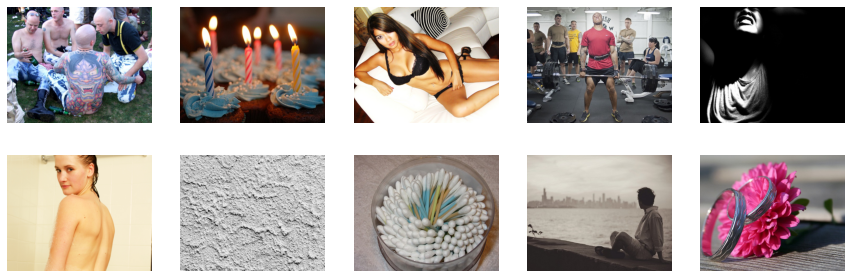

final


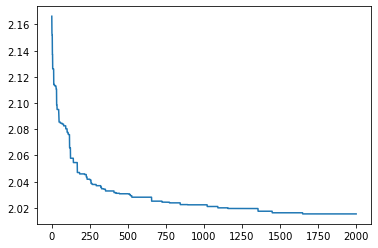

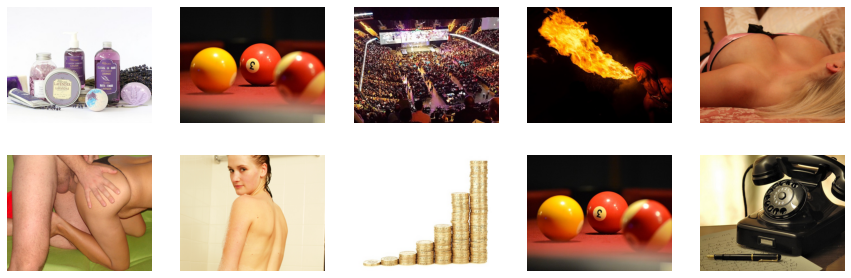

In [32]:
MC_config = {
    'slideshow_len':10,
    # update each 100 iteration
    'replace':[0.4,0.5], 
    'bad_move': [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0]
}
max_iteration = 2000
total_cost = 100000000000000000000
slideshow = np.random.choice(slides,size = MC_config['slideshow_len'],replace = True)
cost_recorder = []
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(slideshow[i].image)
    plt.axis('off') # 不显示坐标轴
plt.show()
for i in range(max_iteration):
    old_slideshow = slideshow.copy()
    # replace
    replace_value = np.random.uniform(0,1)
    iter_100 = int(i/100)
    replace_iter = iter_100
    if replace_iter >= len(MC_config['replace']):
        replace_iter = len(MC_config['replace'])-1
    bad_move_iter = iter_100
    if bad_move_iter >= len(MC_config['bad_move']):
        bad_move_iter = len(MC_config['bad_move'])-1
    if replace_value < MC_config['replace'][replace_iter]:
        random_target_index = np.random.randint(0,MC_config['slideshow_len'])
        random_new_index = np.random.randint(0,max_image_num)
        slideshow[random_target_index] = slides[random_new_index]
    else:# switch
        target_index_0 = np.random.randint(0,MC_config['slideshow_len'])
        target_index_1 = np.random.randint(0,MC_config['slideshow_len'])
        tmp_slide = slideshow[target_index_0]
        slideshow[target_index_0] = slideshow[target_index_1] 
        slideshow[target_index_1] = tmp_slide
    # cal cost
    attri_c = cal_attribute_cost(slideshow,target_values,attri_weights)
    curve_c = cal_sequence_cost(slideshow,curves,curve_weights)
    new_total_cost = attri_c + curve_c + weights_dict['repetition'] * check_repetition(slides)
    # update
    if new_total_cost > total_cost: # if bad
        accept_value = np.random.uniform(0,1)
        if accept_value < MC_config['bad_move'][bad_move_iter]:
            # accept bad result
            total_cost = new_total_cost
        else: # reject bad result
            slideshow = old_slideshow
    else:
        total_cost = new_total_cost
    cost_recorder.append(total_cost)
    # if i %1000 == 0:
    #     clear()
    #     l1=plt.plot(np.arange(i+1),cost_recorder)
    #     plt.figure(figsize=(15,5))
    #     for i in range(10):
    #         plt.subplot(2,5,i+1)
    #         plt.imshow(slideshow[i].image)
    #         plt.axis('off') # 不显示坐标轴
    #     plt.show()
print("final")
l1=plt.plot(np.arange(i+1),cost_recorder)

plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(slideshow[i].image)
    plt.axis('off') # 不显示坐标轴
plt.show()

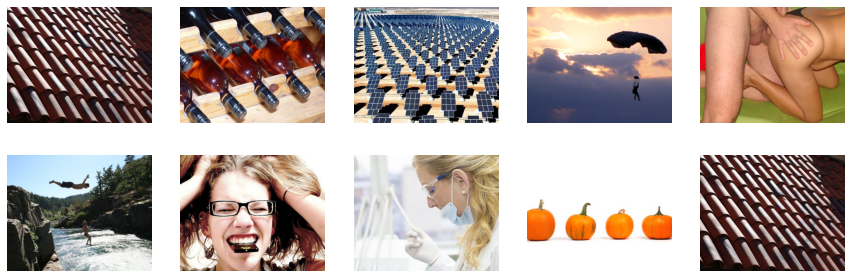

In [8]:
for _ in range(3):
    plt.figure(figsize=(15,5))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(slideshow[i].image)
        plt.axis('off') # 不显示坐标轴
    plt.show()
    clear(wait=True)

In [33]:
# read costs from cost recorder to csv
import csv

with open('greedy_curves.csv','a') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow([4]+[str(v) for v in cost_recorder])

In [12]:
# field names  
fields = ['Name', 'Branch', 'Year', 'CGPA']  
    
# data rows of csv file  
rows = [ ['Nikhil', 'COE', '2', '9.0'],  
         ['Sanchit', 'COE', '2', '9.1'],  
         ['Aditya', 'IT', '2', '9.3'],  
         ['Sagar', 'SE', '1', '9.5'],  
         ['Prateek', 'MCE', '3', '7.8'],  
         ['Sahil', 'EP', '2', '9.1']]  
    
# name of csv file  
filename = "university_records.csv"
    
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(fields)  
        
    # writing the data rows  
    csvwriter.writerows(rows) 